# Clusteren

In [122]:
# importeren packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # voor scalen
from sklearn.cluster import KMeans # voor clusteren
from matplotlib import pyplot as plt


pd.set_option('display.max_columns', None) 

#### inladen data

In [138]:
buurten = pd.read_csv('buurten.csv', encoding='utf-16')

### kolommen selecteren op basis van feature importances uit modellen, en eigen inzicht

In [162]:
#selecteer alleen kolommen met belangrijkste feature importance, buurtcode, en score door XGB model

# streng
#feature_cols = ['buurtcode','inw', 'bevdh', 'hh', 'inw65', 'KL18',
#                'AantalPodiumk10',       
#                'aandeelMH19', 
#                'woxdelta5jr', 'woxww', 'woxm2', 
#                'woxGem', 'woxwwGem', 'woxm2Gem', 
#                'woxm2WG','banen'] 

# niet zo streng
feature_cols = ['buurtcode','inw', 'bevdh', 'hh', 'inw65', 'KL18',
                'RLBRMTR18', 'RLBWON18', 'RLBBEV18', 'RLBVRZ18', 'RLBVEI18', 'RLBFYS18', 
                'AantalCafe3', 
                'AantalMusea10', 'AantalPodiumk10',       
                'aandeelMH19', 
                'woxdelta1jr', 'woxww', 'woxm2', 
                'woxGem', 'woxwwGem', 'woxm2Gem', 
                'woxm2WG','banen'] 

# niet zo streng
feature_cols = ['buurtcode', 'bevdh', 'KL18',
                'RLBRMTR18', 'RLBWON18', 'RLBBEV18', 'RLBVRZ18', 'RLBVEI18', 'RLBFYS18', 
                'AantalCafe3', 
                'AantalMusea10', 'AantalPodiumk10',       
                'aandeelMH19', 
                'woxdelta1jr', 'woxww', 'woxm2', 
                'woxGem', 'woxwwGem', 'woxm2Gem', 
                'woxm2WG','banen'] 
# niet zo streng, zonder wox
#feature_cols = ['buurtcode','inw', 'bevdh', 'hh', 'inw65', 'KL18',
#                'RLBRMTR18', 'RLBWON18', 'RLBBEV18', 'RLBVRZ18', 'RLBVEI18', 'RLBFYS18', 
#                'AantalCafe3', 
#                'AantalMusea10', 'AantalPodiumk10',       
#                'aandeelMH19', 
#                'banen'] 


# alles
#feature_cols = ['buurtcode','inw', 'bevdh', 'oadh', 'hh', 'inw65', 'KL16', 'KL18', 'VKL1618',
#                'RLBRMTR18', 'RLBWON18', 'RLBBEV18', 'RLBVRZ18', 'RLBVEI18', 'RLBFYS18', 
#                'AfstandSupermarkt', 'AantalLevensm3', 'AfstandHuisarts', 'AantalCafe3','AantalRest3', 'AantalKinderopvang1', 
#                'AfstandZwembad', 'AantalMusea10', 'AantalPodiumk10', 'AantalBios5', 
#                'hh19inkLaag', 'hh30inkLaag', 'hh19inkMidden', 'hh30inkMidden', 'hh19inkHoog', 'hh30inkHoog', 
#                'aandeelMH19', 'auto30', 'auto60', 'ov30', 'ov60', 'fiets', 
#                'wox', 'woxdelta1jr', 'woxdelta5jr', 'woxww', 'woxm2', 
#                'woxGem', 'woxdelta1jrGem', 'woxdelta5jrGem', 'woxwwGem', 'woxm2Gem', 'woxdelta5jrWGabs', 'woxdelta5jrWGrel', 
#                'woxm2WG','banen'] 


df_full = buurten[feature_cols]
df_full.shape

(13624, 21)

### missing values verwijderen
- Veel missing values, voor nu aannemen dat hier geen bias in zit omdat dit eerste scan is
- Deze stap doen na het selecteren van kolommen zodat er zo min mogelijk missing zijn

In [163]:
df_clean = df_full
df_clean.dropna(inplace=True)
df_clean.shape

C:\Users\rondea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(5686, 21)

### scalen kolommen
Er zitten grote verschillen in schaal tussen de kolommen en we weten dat de achterliggende verdelingen niet normaal/Gaussian zijn, daarom scalen

In [164]:
# gebruik MinMaxScaler uit sklearn
mms = MinMaxScaler()
mms.fit(df_clean)

# maak nieuw dataframe voor gescalede data
df_scaled = mms.transform(df_clean)

### elbowen
- bepalen hoeveel clusters er zijn

In [165]:
# Loop met verschillende hoeveelheden clusters als input op sum of squares
Sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)

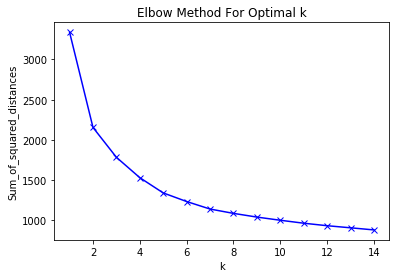

In [166]:
# Plotten
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### clusters evalueren

In [167]:
# aangeven welke parameters mogelijk in algoritme
#KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
#    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
#    random_state=None, tol=0.0001, verbose=0)

In [168]:
# kiezen parameters
kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')

# en fitten model op scaled data
kfit = kmeans.fit(df_scaled)
identified_clusters = kfit.predict(df_scaled)

In [169]:
# clusters zijn gemaakt op gescalede data, maar worden voor interpretatie toegevoegd aan data met oorspronkelijke schaal
df_cluster = df_clean
df_cluster['Cluster'] = identified_clusters

#buurtcode/naam mapping
mapping1 = buurten[['buurtcode','buurtnaam', 'gemeentenaam']]
df_cluster = pd.merge(df_cluster, mapping1, on='buurtcode')


C:\Users\rondea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
buurtscores = pd.read_csv('predicties EE alle data, met wox.csv', encoding='utf-16')
mapping2 = buurtscores[['buurtcode','pred_EE']]
df_cluster = pd.merge(df_cluster, mapping2, on='buurtcode')

In [171]:
# schrijf scoren met clusters weg
df_cluster.to_csv('clusters.csv', encoding='utf-16', index=False)

In [172]:
df_cluster

,buurtcode,bevdh,KL18,RLBRMTR18,RLBWON18,RLBBEV18,RLBVRZ18,RLBVEI18,RLBFYS18,AantalCafe3,AantalMusea10,AantalPodiumk10,aandeelMH19,woxdelta1jr,woxww,woxm2,woxGem,woxwwGem,woxm2Gem,woxm2WG,banen,Cluster,buurtnaam,gemeentenaam,pred_EE
0,140000,11866.0,9.0,0.316187,0.064120,0.115884,0.398445,-0.197204,-0.065058,130.3,5.9,6.0,0.118598,7.3,273000.0,2850.0,345.0,225000.0,2350.0,1.212766,193609.194444,0,Binnenstad-Noord,Groningen,b
1,140001,11913.0,8.0,0.162072,0.061772,0.107766,0.371104,-0.275080,-0.103491,130.7,5.6,6.0,0.122711,7.3,273000.0,2850.0,345.0,225000.0,2350.0,1.212766,203859.222222,0,Binnenstad-Zuid,Groningen,b
2,140002,14781.0,8.0,0.148111,0.074163,0.096713,0.326250,-0.222376,-0.126639,130.5,5.3,6.0,0.134375,7.3,273000.0,2850.0,345.0,225000.0,2350.0,1.212766,200227.148148,0,Binnenstad-Oost,Groningen,b
3,140003,17712.0,8.0,0.188456,0.092412,0.106714,0.299930,-0.179223,-0.131378,130.1,6.3,6.0,0.151724,7.3,273000.0,2850.0,345.0,225000.0,2350.0,1.212766,196202.933333,0,Binnenstad-West,Groningen,b
4,140005,12828.0,9.0,0.248645,0.077531,0.104600,0.292323,-0.141148,-0.084660,129.4,6.0,6.0,0.140476,7.3,273000.0,2850.0,345.0,225000.0,2350.0,1.212766,189062.151515,0,Hortusbuurt-Ebbingekwartier,Groningen,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,19480429,3989.0,6.0,-0.142943,0.021995,-0.046278,-0.061387,-0.071470,0.014197,6.0,4.3,5.0,0.260563,5.2,290000.0,2300.0,314.0,318000.0,2400.0,0.958333,220230.958333,1,Veghel Centrum,Meierijstad,b
5820,19480430,5310.0,6.0,-0.185487,-0.086884,-0.086006,-0.086544,0.062020,0.011927,6.0,3.8,4.9,0.292308,5.2,290000.0,2300.0,314.0,318000.0,2400.0,0.958333,220290.666667,1,Veghel Zuid 1,Meierijstad,b
5821,19480431,5672.0,5.0,-0.252532,-0.136273,-0.106382,-0.118248,0.071325,0.037047,6.0,2.7,4.1,0.432099,5.2,290000.0,2300.0,314.0,318000.0,2400.0,0.958333,215399.250000,1,Veghel Zuid 2,Meierijstad,b
5822,19480432,2626.0,6.0,-0.077860,-0.061162,0.014623,-0.086318,-0.024212,0.079209,6.0,4.1,5.0,0.434783,5.2,290000.0,2300.0,314.0,318000.0,2400.0,0.958333,212071.166667,1,Vijverwijk,Meierijstad,b


In [173]:
# maak evaluatie dataframe en schrijf die weg
evaluatie = df_cluster.groupby(['Cluster']).mean()

evaluatie.to_csv('evaluatie.csv', encoding='utf-16', index=False)

In [174]:
evaluatie

,buurtcode,bevdh,KL18,RLBRMTR18,RLBWON18,RLBBEV18,RLBVRZ18,RLBVEI18,RLBFYS18,AantalCafe3,AantalMusea10,AantalPodiumk10,aandeelMH19,woxdelta1jr,woxww,woxm2,woxGem,woxwwGem,woxm2Gem,woxm2WG,banen
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.945516e+06,6121.863510,5.738162,-0.134094,-0.038208,-0.031814,0.035237,-0.084584,-0.014725,31.008496,4.749861,4.028064,0.301560,7.069220,246178.272981,2336.664345,312.701950,266538.300836,2421.135097,0.966383,196100.661980
1,1.799674e+07,3287.693572,7.399103,0.090068,0.010651,0.029088,-0.040178,0.068886,0.021621,4.973393,4.702093,3.528700,0.522311,6.002990,383210.762332,3034.529148,317.191330,369579.970105,3007.997010,1.008230,282168.563068
2,4.862983e+06,9456.000000,5.353066,-0.196140,-0.017349,-0.085951,0.126090,-0.139372,-0.079559,68.910571,17.286469,13.997886,0.298329,7.208879,297114.164905,3150.845666,394.336152,323630.021142,3352.959831,0.955622,469443.344821
3,3.636002e+06,13231.613232,6.460560,-0.011598,0.045411,-0.064759,0.324865,-0.189082,-0.128033,206.710687,42.226463,46.838931,0.355321,3.658015,494419.847328,5637.277354,545.381679,474295.165394,5701.399491,0.989133,637177.198269
4,4.527528e+06,4370.072664,7.794983,0.150242,0.032945,0.029353,0.012551,0.054757,0.020636,13.711938,8.822318,6.431574,0.531075,5.840225,447221.453287,3584.515571,359.665225,400951.557093,3482.785467,1.032689,316585.144028
5,4.378448e+06,2608.502062,7.981143,0.163674,0.043663,0.047763,-0.045845,0.081576,0.036518,10.184266,3.395816,2.801355,0.510993,6.585563,319361.814968,2497.142015,301.833824,279584.560990,2409.428403,1.038060,142102.684335


### Leringen

- 3 clusters om een buurtscore op te geven is weinig, maar wel een kantelpunt in de elbow grafiek in eigenlijk alle combinaties van feature kolommen. Dus eigenlijk een wat beperkt, maar logisch niveau om op te scoren. Het is niet zo dat blijkt dat het in 2 of 4 clusters moet zijn. Bij rond de 6 clusters geven deze wel vaak aardig groepen buurten weer, zoals goed of minder goed landelijk wonen. Stedelijke betaalbare buurten. 
- clusters lijken vaak logisch
    - bijvoorbeeld op basis van stad of gebied
    - interessant hoe ook regio's vaak bij elkaar gezet worden
- nog uitzoeken of de verschillen tussen clusters overen komen met de feature importances, om te zien of we hier grotendeels hetzelfde meten als in de 
- we missen het echt naar buurtpotentie kunnen kijken, maar buurtaantrekkelijkheid gaat best goed
    - we merken dat we (vanuit de quick scan nu) goed zijn in buurtaantrekkelijkheid beoordelen, maar we hebben ook echt data die iets zegt over aantrekkelijkheid en minder over potentie, wat we ook minder goed kunnen bepalen
    - als we data hebben die meer zegt over potentie kunnen we op deze manier mogelijk ook vergelijkbaar goed buuten daarop (beoordelen door) clusteren als met een supervised methode


### Commentaren
- Kolommen die niets lijken toe te voegen aan clusters (wanneer model gedraaid wordt met alle kolommen, met 6 clusters):
    - KL16 (bijna exact hetzelfde als KL18, en dan gaat voorkeur naar KL18)
    - VKL1618
    - RLBWON18
    - woxdelta5jrWGrel (zoals ook in bomen al tot verrassing geconstateerd)
- Outliers bestaan in de data (zie EDA), maar niet de tijd genomen om die eruit te halen. Outliers in deze data lijken ook niet te komen van meetfouten.

### Hierarchische cluster

In [160]:

import scipy.cluster.hierarchy as sch

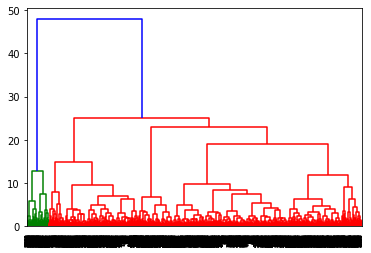

In [161]:
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))